In [38]:
from itertools import cycle

from cowerc_adsorption import PhysicalParams, Simulation, ExperimentalBreakthroughData
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patheffects import Stroke
from math import pi
from pathlib import Path

import pandas as pd
from scipy.optimize import Bounds, curve_fit

In [39]:
def plot_btc_and_data(simulation: Simulation, experimental_data: ExperimentalBreakthroughData):
    fig = simulation.plot_breakthrough()
    ax = fig.axes[0]
    colors = cycle(["darkgrey", "purple", "blue", "green", "orange", "red"])

    for btc, color in zip(experimental_data.conc, colors):
        ax.scatter(
            experimental_data.time,
            btc,
            c=color,
            path_effects=[Stroke(linewidth=1, foreground="#000")],
        )

    ax.set_ylim(bottom=-0.09, top=1.4)
    plt.close(fig)
    return fig

In [40]:
excel_file = Path("../../.data/Data and Column Properties.xlsx")
sheet_name = "WW All Contaminants 0.18-min"

In [41]:
# Read Emma's excel report
xls_setup = pd.read_excel(excel_file, sheet_name=sheet_name, nrows=18, usecols="A:B", index_col=0)
xls_setup

,Value
Design Parameters,
Column Diameter (cm),0.660000
Column Area (cm^2),0.340000
Particle Size (cm),0.016800
Column Diameter/Particle Size Ratio,39.285714
Reynold&apos;s Number,0.270000
Bed Voidage (ε),0.500000
Hydraulic Loading Rate (cm/s),0.080000
EBCT,0.180000
Flow Rate (mL/s),0.028000


In [42]:
xls_influent = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=11, nrows=4, usecols="D:J")
xls_influent

,Unnamed: 3,PFOA,PFHxA,PFHxS,BEZ,DCF,PFBA
0,Influent 1,185.0,161.50,376,391.00,318.50,160.0
1,Influent 2,161.0,164.00,347,366.50,355.50,165.5
2,Influent 3,189.5,179.50,411,334.00,326.00,174.0
3,Influent AVG,178.5,168.33,378,363.83,333.33,166.5


In [43]:
xls_btc = pd.read_excel(excel_file, sheet_name=sheet_name, header=19, usecols="A:Q")
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1,30.000000,49.5,170.689655,825.000000,0.50,0.002801,13.70,0.081386,0.00,0.000000,51.25,0.140861,61.30,0.18390,0.00,0.000000
1,2,91.818182,151.5,522.413793,2525.000000,0.00,0.000000,20.50,0.121782,0.00,0.000000,84.00,0.230875,72.45,0.21735,41.35,0.248348
2,3,277.272727,457.5,1577.586207,7625.000000,11.35,0.063585,43.55,0.258713,10.36,0.027407,154.50,0.424645,99.95,0.29985,128.00,0.768769
3,4,775.454545,1279.5,4412.068966,21325.000000,19.15,0.107283,56.10,0.333267,34.05,0.090079,251.50,0.691251,127.50,0.38250,182.00,1.093093
4,5,1274.848485,2103.5,7253.448276,35058.333333,26.80,0.150140,86.75,0.515347,49.80,0.131746,275.00,0.755841,131.15,0.39345,194.50,1.168168
5,6,2325.757576,3837.5,13232.758621,63958.333333,34.25,0.191877,129.00,0.766337,41.75,0.110450,346.00,0.950985,185.50,0.55650,219.50,1.318318
6,7,2882.121212,4755.5,16398.275862,79258.333333,45.60,0.255462,118.50,0.703960,55.05,0.145635,358.50,0.985341,139.00,0.41700,173.00,1.039039
7,9,3403.333333,5615.5,19363.793103,93591.666667,43.75,0.245098,116.00,0.689109,63.00,0.166667,377.00,1.036189,164.00,0.49200,170.50,1.024024
8,10,3924.545455,6475.5,22329.310345,107925.000000,59.25,0.331933,131.00,0.778218,96.60,0.255556,392.50,1.078791,229.00,0.68700,176.50,1.060060
9,12,4966.969697,8195.5,28260.344828,136591.666667,70.05,0.392437,111.00,0.659406,100.05,0.264683,376.00,1.033440,259.00,0.77700,174.50,1.048048


In [44]:
setup = xls_setup.to_dict()["Value"]

In [45]:
porosity = setup["Bed Voidage (ε)"]
lenght = setup["Bed Length (cm)"]

area = 0.25 * pi * setup["Column Diameter (cm)"] ** 2  # cm²
pore_velocity = setup["Flow Rate (mL/min)"] / (area * porosity)  # cm/min

In [46]:
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1,30.000000,49.5,170.689655,825.000000,0.50,0.002801,13.70,0.081386,0.00,0.000000,51.25,0.140861,61.30,0.18390,0.00,0.000000
1,2,91.818182,151.5,522.413793,2525.000000,0.00,0.000000,20.50,0.121782,0.00,0.000000,84.00,0.230875,72.45,0.21735,41.35,0.248348
2,3,277.272727,457.5,1577.586207,7625.000000,11.35,0.063585,43.55,0.258713,10.36,0.027407,154.50,0.424645,99.95,0.29985,128.00,0.768769
3,4,775.454545,1279.5,4412.068966,21325.000000,19.15,0.107283,56.10,0.333267,34.05,0.090079,251.50,0.691251,127.50,0.38250,182.00,1.093093
4,5,1274.848485,2103.5,7253.448276,35058.333333,26.80,0.150140,86.75,0.515347,49.80,0.131746,275.00,0.755841,131.15,0.39345,194.50,1.168168
5,6,2325.757576,3837.5,13232.758621,63958.333333,34.25,0.191877,129.00,0.766337,41.75,0.110450,346.00,0.950985,185.50,0.55650,219.50,1.318318
6,7,2882.121212,4755.5,16398.275862,79258.333333,45.60,0.255462,118.50,0.703960,55.05,0.145635,358.50,0.985341,139.00,0.41700,173.00,1.039039
7,9,3403.333333,5615.5,19363.793103,93591.666667,43.75,0.245098,116.00,0.689109,63.00,0.166667,377.00,1.036189,164.00,0.49200,170.50,1.024024
8,10,3924.545455,6475.5,22329.310345,107925.000000,59.25,0.331933,131.00,0.778218,96.60,0.255556,392.50,1.078791,229.00,0.68700,176.50,1.060060
9,12,4966.969697,8195.5,28260.344828,136591.666667,70.05,0.392437,111.00,0.659406,100.05,0.264683,376.00,1.033440,259.00,0.77700,174.50,1.048048


In [47]:
experimental_data = ExperimentalBreakthroughData(
    time=np.round((xls_btc["Time (min.)"] * lenght / pore_velocity), 2).to_numpy(),
    conc=xls_btc[["PFBA C/C0", "BEZ C/C0", "PFHxA C/C0", "DCF C/C0", "PFOA C/C0", "PFHxS C/C0"]].to_numpy().T,
)


In [48]:
# Print observations for Ostrich
# for i, c in enumerate(experimental_data.conc.flatten(), 0):
#     print(f"obs{i}\t{c:.4f}\t1\tresults.dat\tOST_NULL\t{i}\t1")

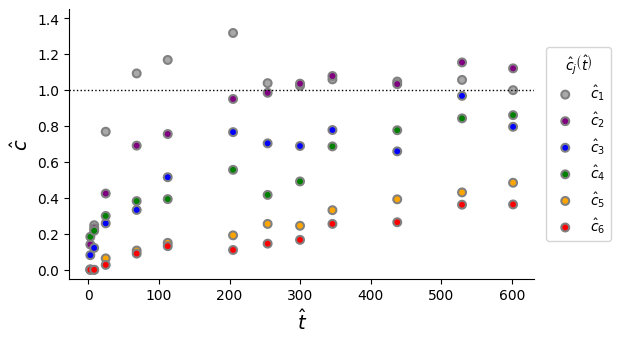

In [49]:
experimental_data.plot_breakthrough()

Finished solve() in 0.9883 secs


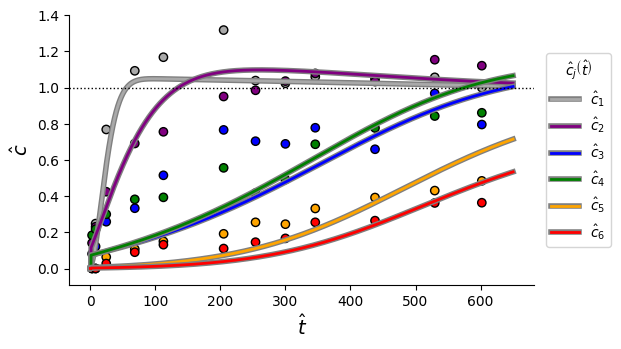

In [50]:
p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=1000.0,
    k_ads=(50, 25, 30, 30, 60, 70),
    k_des=(2, 0.4, 0.02, 0.025, 0.015, 0.01),
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

Finished solve() in 1.0779 secs


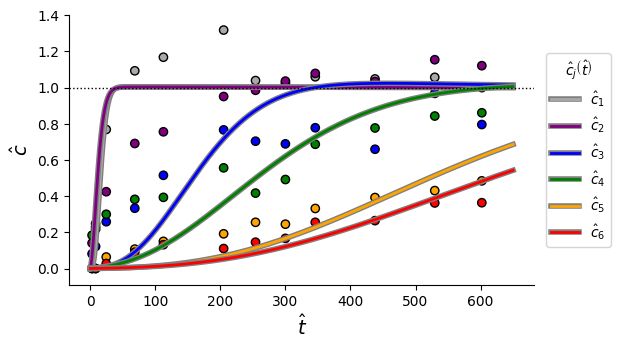

In [51]:
## Running OSTRICH with equal weights and a swarm
optimal_parameter_set = [
    6.417450e03,
    9.138204e01,
    4.655070e01,
    9.418818e01,
    7.295632e01,
    9.675425e01,
    9.170499e01,
    5.966999e00,
    4.019014e00,
    5.375258e-01,
    2.455025e-01,
    1.547105e-01,
    1.220075e-01,
]


p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

Finished solve() in 1.0322 secs


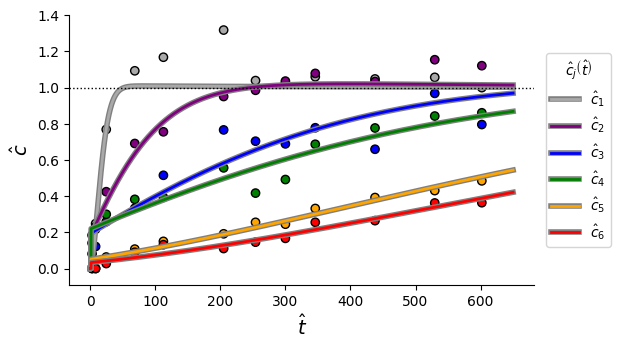

In [52]:
## With SCIPY and equal weights
optimal_parameter_set = [
    3.20820377e03,
    4.89943936e01,
    1.93629419e01,
    1.86957545e01,
    1.73036934e01,
    3.42319567e01,
    3.93632565e01,
    2.95562940e00,
    2.88420665e-01,
    6.91278275e-02,
    4.28843117e-02,
    3.38509608e-02,
    2.94488636e-02,
]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

Finished solve() in 1.0184 secs


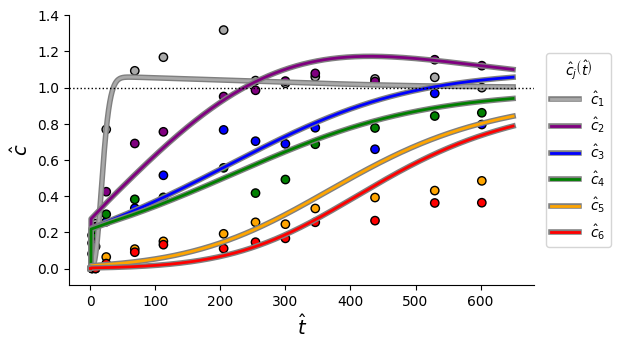

In [53]:
## Addind weigth to the first and second experiment
## Using SCIPY
optimal_parameter_set = [
    671.5748313021018,
    100.0,
    14.78929753,
    17.23790953,
    17.42971742,
    48.38321385,
    67.25235814,
    5.16884663e00,
    7.80473223e-02,
    7.62786831e-03,
    1.00000000e-05,
    1.00000000e-05,
    1.00000000e-05,
]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

Finished solve() in 0.9937 secs


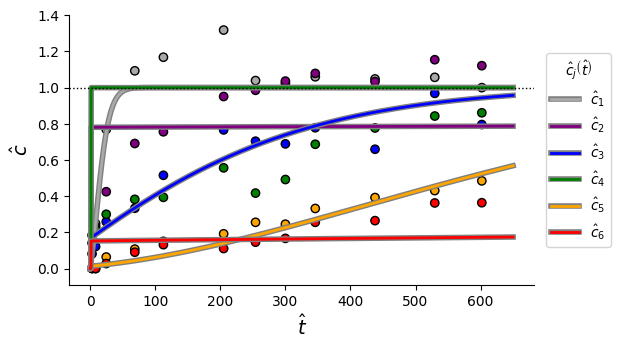

In [54]:
optimal_parameter_set = [
    4.342649e00,
    1.589651e00,
    4.487679e-01,
    1.307947e00,
    -2.713914e00,
    1.706075e00,
    1.333454e00,
    3.728868e-01,
    -4.862839e00,
    -1.014885e00,
    -6.162208e-01,
    -1.121953e00,
    -3.124197e00,
]

optimal_parameter_set = [10**x for x in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
)

sim = Simulation(**p.nondim)
sim.end_time = 650
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

In [ ]:
# def f(
#     times_to_query,
#     sm,
#     kads_1,
#     kads_2,
#     kads_3,
#     kads_4,
#     kads_5,
#     kads_6,
#     kdes_1,
#     kdes_2,
#     kdes_3,
#     kdes_4,
#     kdes_5,
#     kdes_6,
# ):
#     k_ads = (kads_1, kads_2, kads_3, kads_4, kads_5, kads_6)
#     k_des = (kdes_1, kdes_2, kdes_3, kdes_4, kdes_5, kdes_6)

#     p = PhysicalParams(
#         L=lenght,
#         v=pore_velocity,
#         n=porosity,
#         sm=sm,
#         k_ads=k_ads,
#         k_des=k_des,
#     )

#     sim = Simulation(**p.nondim)
#     sim.end_time = 650
#     sim.cfl = 0.9
#     sim.solve()

#     # Query the btc from t
#     t, btc = sim.btc
#     results = [np.interp(times_to_query, t, c) for c in btc]
#     results = np.array(results)
#     return results.flatten()


In [ ]:
# p0 = (
#     500,  # sm
#     *((50,) * 6),  # kads
#     *(1.5, 0.5, 0.15, 0.10, 0.02, 0.01),  # kdes
# )

# print(f(experimental_data.time, *p0))

Finished solve() in 0.8872 secs
[0.02826316 0.10087822 0.46134714 1.09208621 1.1171286  1.05244152
 1.03392615 1.02322094 1.01670357 1.01012065 1.0069877  1.00540426
 0.01840818 0.03860891 0.13665996 0.59845466 1.02696972 1.19881928
 1.13883909 1.09248401 1.06304215 1.03487197 1.02309303 1.01762668
 0.01527335 0.0221208  0.05073099 0.19776135 0.44051578 0.97434454
 1.12892731 1.1899439  1.20043353 1.16312721 1.11674311 1.08812355
 0.01483906 0.02001481 0.04092433 0.14501453 0.32283311 0.78348431
 0.96567435 1.074047   1.13395834 1.16878971 1.15462077 1.13310672
 0.01415127 0.01677852 0.02673152 0.0706408  0.14242748 0.35055036
 0.45866606 0.54630339 0.62038882 0.73725876 0.82497751 0.87876313
 0.01406591 0.0163856  0.02509174 0.06243763 0.12184178 0.28945333
 0.37514112 0.44441115 0.50324366 0.59798245 0.67249428 0.72085643]


In [ ]:
# ## No bias, all observations are equal
# p0 = (
#     10000,  # sm
#     *((50,) * 6),  # kads
#     *(1.5, 0.5, 0.15, 0.10, 0.02, 0.01),  # kdes
# )

# bounds = Bounds(
#     lb=[1, *(0.01, 0.01, 0.01, 0.01, 0.01, 0.01), *(0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)],
#     ub=[50000, *(100, 100, 100, 100, 100, 100), *(10, 10, 10, 10, 10, 10)],
# )

# ydata = experimental_data.conc

# fitting_result = curve_fit(
#     f,
#     xdata=experimental_data.time,
#     ydata=ydata.flatten(),
#     p0=p0,
#     bounds=bounds,
#     method="trf",
#     loss="soft_l1",
#     full_output=True,
# )

Finished solve() in 0.8828 secs
Finished solve() in 0.8489 secs
Finished solve() in 0.8333 secs
Finished solve() in 0.8490 secs
Finished solve() in 0.8428 secs
Finished solve() in 0.8397 secs
Finished solve() in 0.8454 secs
Finished solve() in 0.8427 secs
Finished solve() in 0.8413 secs
Finished solve() in 0.8326 secs
Finished solve() in 0.8337 secs
Finished solve() in 0.8338 secs
Finished solve() in 0.8251 secs
Finished solve() in 0.8322 secs
Finished solve() in 0.8319 secs
Finished solve() in 0.8371 secs
Finished solve() in 0.8392 secs
Finished solve() in 0.8393 secs
Finished solve() in 0.8323 secs
Finished solve() in 0.8437 secs
Finished solve() in 0.8379 secs
Finished solve() in 0.8889 secs
Finished solve() in 0.8662 secs
Finished solve() in 0.8472 secs
Finished solve() in 0.8407 secs
Finished solve() in 0.8589 secs
Finished solve() in 0.8562 secs
Finished solve() in 0.8445 secs
Finished solve() in 0.8357 secs
Finished solve() in 0.8317 secs
Finished solve() in 0.8285 secs
Finished

In [ ]:
# fitting_result[0]

array([3.20820377e+03, 4.89943936e+01, 1.93629419e+01, 1.86957545e+01,
       1.73036934e+01, 3.42319567e+01, 3.93632565e+01, 2.95562940e+00,
       2.88420665e-01, 6.91278275e-02, 4.28843117e-02, 3.38509608e-02,
       2.94488636e-02])

PhysicalParams(L=0.85, v=9.645754126781533, n=0.5, sm=np.float64(3208.2037707253216), k_ads=array([48.9943936 , 19.36294192, 18.69575453, 17.30369341, 34.23195669,
       39.36325649]), k_des=array([2.9556294 , 0.28842067, 0.06912783, 0.04288431, 0.03385096,
       0.02944886]), C_0=array([1., 1., 1., 1., 1., 1.]))

Finished solve() in 3.7510 secs


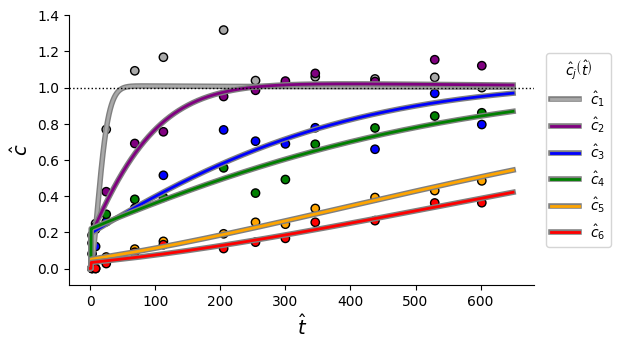

In [ ]:
# best_params = fitting_result[0]

# p = PhysicalParams(
#     L=lenght,
#     v=pore_velocity,
#     n=porosity,
#     sm=best_params[0],
#     k_ads=best_params[1:7],
#     k_des=best_params[7:],
# )

# display(p)

# nsim = Simulation(**p.nondim)
# nsim.end_time = 650
# nsim.cfl = 0.9
# nsim.solve()

# fig = nsim.plot_breakthrough()
# ax = fig.axes[0]
# colors = cycle(["darkgrey", "purple", "blue", "green", "orange", "red"])

# for btc, color in zip(experimental_data.conc, colors):
#     ax.scatter(
#         experimental_data.time,
#         btc,
#         c=color,
#         path_effects=[Stroke(linewidth=1, foreground="#000")],
#     )

# ax.set_ylim(bottom=-0.09, top=1.4)
# display(fig)

In [ ]:
# ## With bias on certain observed points
# p0 = (
#     100,  # sm
#     *(1,) * 6,  # kads
#     *(1, 0.5, 0.15, 0.10, 0.02, 0.01),  # kdes
# )

# bounds = Bounds(
#     lb=[10, *(0.01,) * 6, *(0.00001,) * 6],
#     ub=[1_000, *(100,) * 6, *(10,) * 6],
# )

# ydata = experimental_data.conc
# sigma = np.ones_like(ydata) * 0.05
# sigma[0, 2:7] = 0.001
# sigma[-1:, -4:] = 0.001

# fitting_result_bias = curve_fit(
#     f,
#     xdata=experimental_data.time,
#     ydata=ydata.flatten(),
#     p0=p0,
#     bounds=bounds,
#     sigma=sigma.flatten(),
#     absolute_sigma=True,
#     method="trf",
#     loss="soft_l1",
#     full_output=True,
# )

Finished solve() in 1.9447 secs
Finished solve() in 0.8445 secs
Finished solve() in 0.8342 secs
Finished solve() in 0.8053 secs
Finished solve() in 0.8453 secs
Finished solve() in 0.8156 secs
Finished solve() in 0.8187 secs
Finished solve() in 0.8325 secs
Finished solve() in 0.8291 secs
Finished solve() in 0.8086 secs
Finished solve() in 0.8345 secs
Finished solve() in 0.8151 secs
Finished solve() in 0.8245 secs
Finished solve() in 0.8296 secs
Finished solve() in 0.8263 secs
Finished solve() in 0.8185 secs
Finished solve() in 0.8385 secs
Finished solve() in 0.8182 secs
Finished solve() in 0.8264 secs
Finished solve() in 0.8380 secs
Finished solve() in 0.8362 secs
Finished solve() in 0.8191 secs
Finished solve() in 0.8383 secs
Finished solve() in 0.8150 secs
Finished solve() in 0.8328 secs
Finished solve() in 0.8399 secs
Finished solve() in 0.8325 secs
Finished solve() in 0.8195 secs
Finished solve() in 0.8545 secs
Finished solve() in 0.8221 secs
Finished solve() in 0.8457 secs
Finished

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

PhysicalParams(L=0.85, v=9.645754126781533, n=0.5, sm=np.float64(671.5748313021018), k_ads=array([100.        ,  14.78929753,  17.23790953,  17.42971742,
        48.38321385,  67.25235814]), k_des=array([5.16884663e+00, 7.80473223e-02, 7.62786831e-03, 1.00000000e-05,
       1.00000000e-05, 1.00000000e-05]), C_0=array([1., 1., 1., 1., 1., 1.]))

Finished solve() in 0.8673 secs


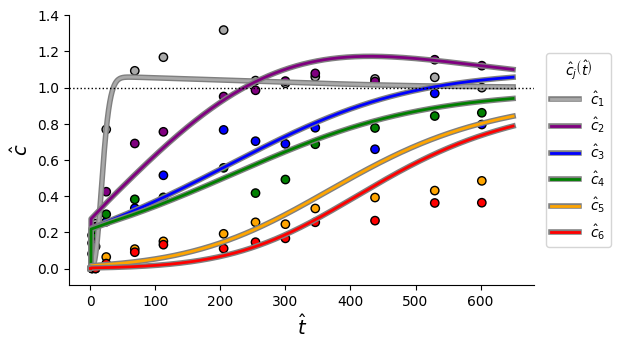

In [ ]:
# best_params_bias = fitting_result_bias[0]

# p = PhysicalParams(
#     L=lenght,
#     v=pore_velocity,
#     n=porosity,
#     sm=best_params_bias[0],
#     k_ads=best_params_bias[1:7],
#     k_des=best_params_bias[7:],
# )

# display(p)

# nsim = Simulation(**p.nondim)
# nsim.end_time = 650
# nsim.cfl = 0.9
# nsim.solve()

# fig = nsim.plot_breakthrough()
# ax = fig.axes[0]
# colors = cycle(["darkgrey", "purple", "blue", "green", "orange", "red"])

# for btc, color in zip(experimental_data.conc, colors):
#     ax.scatter(
#         experimental_data.time,
#         btc,
#         c=color,
#         path_effects=[Stroke(linewidth=1, foreground="#000")],
#     )

# ax.set_ylim(bottom=-0.09, top=1.4)
# display(fig)